In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

df = pd.read_csv('movies.csv')

In [6]:
df = df.dropna()

In [7]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [8]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [15]:
df =df.drop_duplicates()

In [16]:
df.sort_values(by=['gross'],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0


In [17]:
pd.set_option('display.max_rows',None)

In [25]:
df['released'][1][8:12]

'1980'

In [26]:
#Budget has high correlation
#Company has high correlation

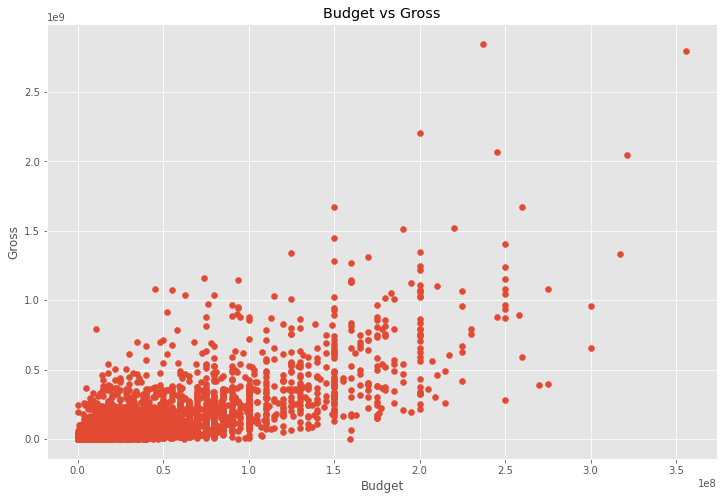

In [30]:
#Scatter plot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

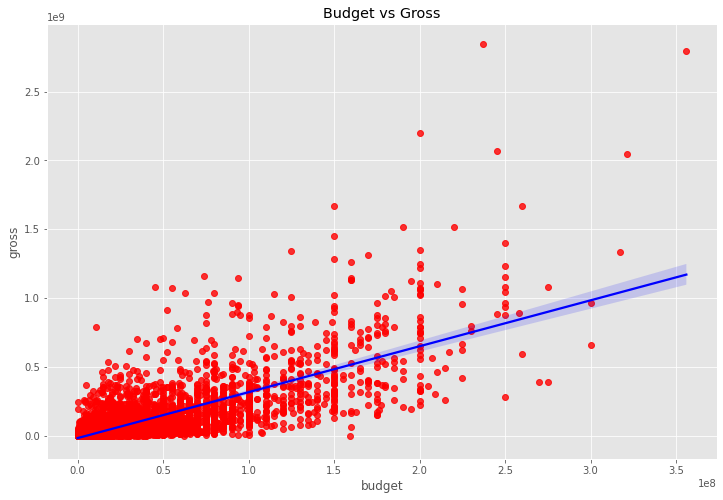

In [33]:
#Budget vs gross using sns
sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})
plt.title('Budget vs Gross')
plt.show()

In [34]:
# Lets start looking at correaltion
#default method is Pearson method
df.corr()   #works only on numerical fields

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [35]:
df.corr(method='kendall')           #works only on numerical fields

,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


In [36]:
df.corr(method='spearman')            #works only on numerical fields

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


In [37]:
correlation_matrix = df.corr()

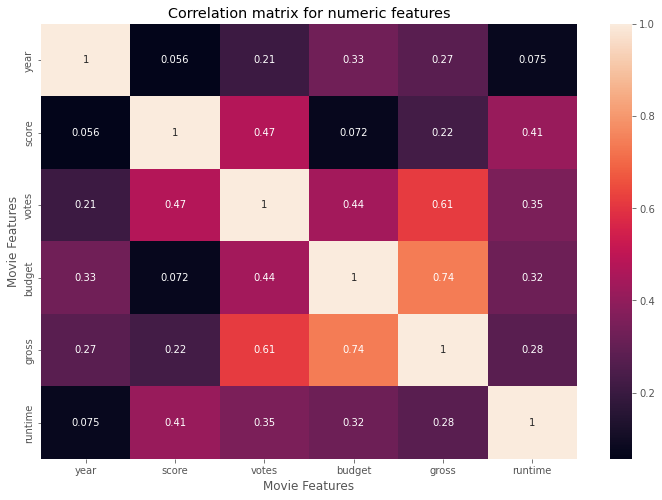

In [42]:
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [44]:
df_num = df

for col in df_num.columns:
    if df_num[col].dtype=='object':
        df_num[col] = df_num[col].astype('category')
        df_num[col] = df_num[col].cat.codes

In [46]:
# df_num

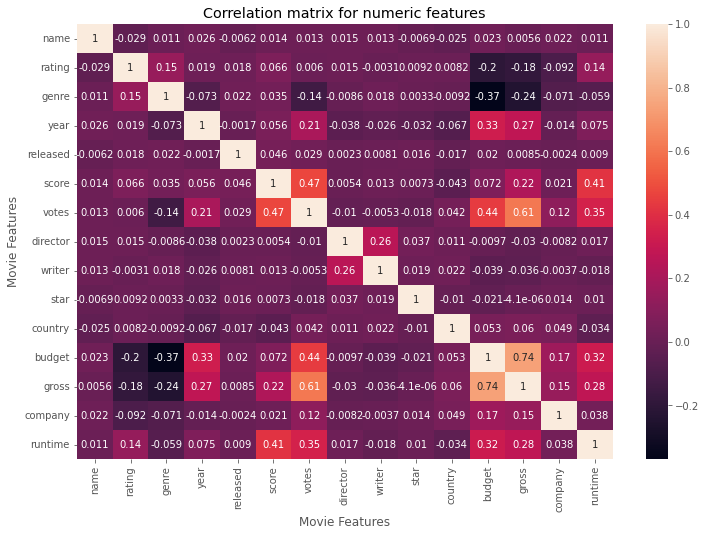

In [47]:
correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [48]:
correlation_mat= df_num.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          released   -0.006152
          score       0.014450
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.005639
          company     0.021697
          runtime     0.010850
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          year        0.019499
          released    0.018083
          score       0.065983
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092357
          runtime     0.140792
genre     name        0.010996
          rating      0.147796
        

In [49]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.368523
genre     budget     -0.368523
          gross      -0.244101
gross     genre      -0.244101
budget    rating     -0.203946
rating    budget     -0.203946
          gross      -0.181906
gross     rating     -0.181906
genre     votes      -0.135990
votes     genre      -0.135990
company   rating     -0.092357
rating    company    -0.092357
genre     year       -0.073167
year      genre      -0.073167
genre     company    -0.071334
company   genre      -0.071334
year      country    -0.066748
country   year       -0.066748
genre     runtime    -0.059237
runtime   genre      -0.059237
country   score      -0.043051
score     country    -0.043051
budget    writer     -0.039466
writer    budget     -0.039466
director  year       -0.038354
year      director   -0.038354
writer    gross      -0.035885
gross     writer     -0.035885
country   runtime    -0.034477
runtime   country    -0.034477
star      year       -0.032157
year      star       -0.032157
director

In [53]:
high_corr = sorted_pairs[sorted_pairs>0.5]
high_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64